# Met data starter code

The following packages are required and can be installed using any package manager (e.g., Conda, pip).  An `environment.yml` file is also provided in the main repo.

In [1]:
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

To read the data, we'll use Pandas (`pd`), a popular package for working with table-like data (think Excel, but Python).  The following code assumes the data has been copied from the UW Atmospheric Sciences website and converted to plain text (.txt).  This can be done as follows:

1. Navigate to https://atmos.washington.edu/cgi-bin/list_uw.cgi, choose a day, and click "Data".
2. Select **all** of the text (`Cmd + A` on Mac or `Ctrl + A` on Windows).  This includes the header with the date.
3. Paste the text into an editor and save it as plain text (`.txt` extension)
   - On Mac: Open TextEdit. By default, TextEdit creates Rich-Text Format files (.rtf). To create plain-text, click `Format > Make Plain Text` before saving the file as a `.txt`.
   - On Windows: Open Notepad. Plain text should be the default.
  
If you are new to Pandas, you can read this introduction here: https://pandas.pydata.org/docs/user_guide/10min.html

First, update the variable `MET_DATA_PATH` with the path to your data.
Then read the data using the `read_csv` function. Providing `r'\s+'` for the `sep` keyword argument indicates the data are delimited by a variable number of spaces.
The argument `skiprows=[0, 1, 2, 4, 5]` tells Pandas to skip these rows, which contain header information or blank lines (Note: lines are counted from 0).

This procedure omits units.  Refer to the original file for this information.

In [2]:
MET_DATA_PATH = './data/met_data.txt'  #TODO: your path here

met_data = pd.read_csv(MET_DATA_PATH,
                       sep=r'\s+',
                       skiprows=[0, 1, 2, 4, 5])

# Writing a variable name on the last line of a notebook cell will print
# it to the workspace:
met_data

,Time,RHum,Temp,Direct,Speed,Gust,Rain,Radiation,Pres
0,01:16:10,48,58,91,6,7,0.0,143.99,1009.6
1,01:17:10,49,0,91,6,0,0.0,0.00,1009.6
2,01:18:10,49,58,94,7,8,0.0,141.40,1009.6
3,01:19:10,48,58,102,7,7,0.0,136.23,1009.6
4,01:20:10,48,58,116,5,8,0.0,96.93,1009.6
...,...,...,...,...,...,...,...,...,...
1194,21:14:10,67,51,196,14,16,0.0,229.76,1011.7
1195,21:15:10,67,50,191,13,14,0.0,226.51,1011.6
1196,21:16:10,67,50,194,14,17,0.0,224.06,1011.6
1197,21:17:10,67,50,198,13,17,0.0,221.95,1011.6


The `time` column is read in as a string, which is not very useful for our purposes.  Instead, we will convert it to an integer representing seconds measured from the start of the day.

**Note**: seconds are a relative measure of time.  When processing geophysical data, we often need to associate measurements with a specific day and time (often called a datetime).  Additional code at the end of this notebook outlines a procedure for converting the time column to datetimes, which enable us to use Pandas' date and time functionality.

If you are new to Pandas, new variables are assigned to the DataFrame using `met_data['new_variable_name] = ...`.


In [3]:
# Convert time to a timedelta and extract the seconds (from 00:00:00).
met_data['Seconds'] = pd.to_timedelta(met_data['Time']).dt.seconds

met_data

,Time,RHum,Temp,Direct,Speed,Gust,Rain,Radiation,Pres,Seconds
0,01:16:10,48,58,91,6,7,0.0,143.99,1009.6,4570
1,01:17:10,49,0,91,6,0,0.0,0.00,1009.6,4630
2,01:18:10,49,58,94,7,8,0.0,141.40,1009.6,4690
3,01:19:10,48,58,102,7,7,0.0,136.23,1009.6,4750
4,01:20:10,48,58,116,5,8,0.0,96.93,1009.6,4810
...,...,...,...,...,...,...,...,...,...,...
1194,21:14:10,67,51,196,14,16,0.0,229.76,1011.7,76450
1195,21:15:10,67,50,191,13,14,0.0,226.51,1011.6,76510
1196,21:16:10,67,50,194,14,17,0.0,224.06,1011.6,76570
1197,21:17:10,67,50,198,13,17,0.0,221.95,1011.6,76630


Now we can plot the data.  Variables are accessed using brackets with the variable name as a string, `met_data['variable_name']`.  This example uses matplotlib, but you are free to use whatever plotting package you'd like.

Text(0, 0.5, 'Wind speed (knot)')

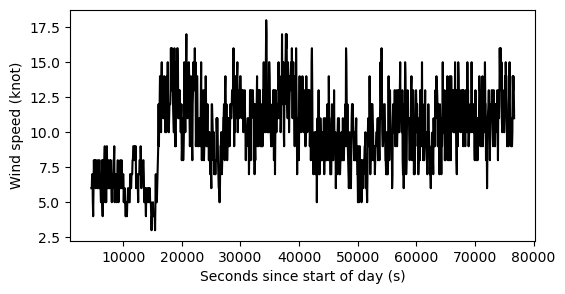

In [4]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(met_data['Seconds'], met_data['Speed'], color='k')
ax.set_xlabel('Seconds since start of day (s)')
ax.set_ylabel('Wind speed (knot)')  # units from .txt file
# fig.savefig('wind_speed_plot.png', dpi=200)  # uncomment to save

Or, as a scatter plot (line plots can be misleading, since gaps in data are connected).

Text(0, 0.5, 'Wind speed (knot)')

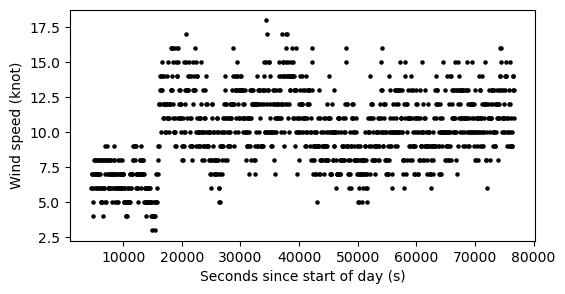

In [5]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.scatter(met_data['Seconds'], met_data['Speed'], color='k', s=5)
ax.set_xlabel('Seconds since start of day (s)')
ax.set_ylabel('Wind speed (knot)')
# fig.savefig('wind_speed_scatter.png', dpi=200)  # uncomment to save

Pandas has many functions which can be accessed in the form of DataFrame methods. For example, if we wanted data only between hours 2 and 3:

In [6]:
in_hour = met_data['Seconds'].between(2*3600, 3*3600)
met_data[in_hour]

,Time,RHum,Temp,Direct,Speed,Gust,Rain,Radiation,Pres,Seconds
44,02:00:10,46,58,114,9,10,0.0,8.58,1009.8,7210
45,02:01:10,46,58,108,7,9,0.0,8.00,1009.8,7270
46,02:02:10,46,58,114,6,9,0.0,7.59,1009.8,7330
47,02:03:10,46,58,122,8,9,0.0,7.21,1009.8,7390
48,02:04:10,46,58,105,8,13,0.0,6.79,1009.8,7450
49,02:05:10,46,58,131,7,9,0.0,6.38,1009.8,7510
50,02:06:10,46,58,129,6,9,0.0,6.16,1009.8,7570
51,02:07:10,46,58,124,6,7,0.0,5.94,1009.8,7630
52,02:08:10,46,0,151,6,0,0.0,0.00,1009.8,7690
53,02:09:10,46,58,130,8,12,0.0,5.61,1009.8,7750


Pandas also includes powerful functions such as [groupby operations](https://pandas.pydata.org/docs/user_guide/groupby.html).  For example, to bin the data every 3600 seconds and take the mean (or median):

In [7]:
# "Cut" the data into bins every 3600 seconds
bins = np.arange(0, (24+1)*3600, 3600)
hours = np.arange(0, 24, 1)
binned_by_hour = pd.cut(met_data["Seconds"], bins=bins, labels=hours)

# Group by cut and take the mean.  Drop the 'Time' column, which is not numerical.
met_data_hourly = met_data.drop(['Time'], axis=1).groupby(binned_by_hour).mean()  # try median?
met_data_hourly.index = met_data_hourly.index.rename('Hour')

met_data_hourly

/var/folders/5k/tj9m5nbs0rb__4sp5qh876yc0000gn/T/ipykernel_14234/1465144519.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  met_data_hourly = met_data.drop(['Time'], axis=1).groupby(binned_by_hour).mean()  # try median?


,RHum,Temp,Direct,Speed,Gust,Rain,Radiation,Pres,Seconds
Hour,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47.000000,54.386364,110.181818,6.681818,8.045455,0.0,49.851818,1009.643902,5860.000000
2,46.583333,55.066667,130.183333,6.416667,7.583333,0.0,2.572667,1009.806667,8980.000000
3,48.561404,54.578947,119.210526,6.614035,7.807018,0.0,0.000000,1009.785965,12618.421053
4,61.833333,44.116667,168.300000,8.900000,8.500000,0.0,0.000000,1010.101754,16180.000000
5,71.983607,45.163934,200.934426,12.327869,13.590164,0.0,0.000000,1010.661111,19755.081967
6,72.216667,46.666667,201.500000,10.633333,12.466667,0.0,0.000000,1011.080357,23380.000000
7,73.000000,47.700000,200.000000,9.616667,11.733333,0.0,0.000000,1011.267797,26980.000000
8,78.066667,32.666667,196.533333,11.583333,9.766667,0.0,0.000000,1011.491379,30580.000000


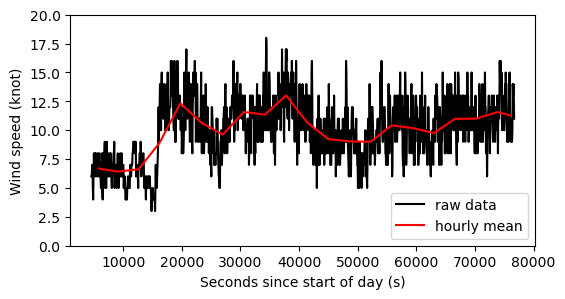

In [8]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(met_data['Seconds'], met_data['Speed'], color='k', label='raw data')
ax.plot(met_data_hourly['Seconds'], met_data_hourly['Speed'], color='r', label='hourly mean')
ax.set_xlabel('Seconds since start of day (s)')
ax.set_ylabel('Wind speed (knot)')
ax.set_ylim([0, 20])
ax.legend()
# fig.savefig('wind_speed_hourly_means.png', dpi=200)  # uncomment to save

Math using DataFrames is easy:

In [9]:
met_data['Temp_K'] = (met_data['Temp'] - 32) * 5/9 + 273.15

met_data

,Time,RHum,Temp,Direct,Speed,Gust,Rain,Radiation,Pres,Seconds,Temp_K
0,01:16:10,48,58,91,6,7,0.0,143.99,1009.6,4570,287.594444
1,01:17:10,49,0,91,6,0,0.0,0.00,1009.6,4630,255.372222
2,01:18:10,49,58,94,7,8,0.0,141.40,1009.6,4690,287.594444
3,01:19:10,48,58,102,7,7,0.0,136.23,1009.6,4750,287.594444
4,01:20:10,48,58,116,5,8,0.0,96.93,1009.6,4810,287.594444
...,...,...,...,...,...,...,...,...,...,...,...
1194,21:14:10,67,51,196,14,16,0.0,229.76,1011.7,76450,283.705556
1195,21:15:10,67,50,191,13,14,0.0,226.51,1011.6,76510,283.150000
1196,21:16:10,67,50,194,14,17,0.0,224.06,1011.6,76570,283.150000
1197,21:17:10,67,50,198,13,17,0.0,221.95,1011.6,76630,283.150000


But if you get sick of them, they can easily become normal Numpy arrays using `met_data.values`:

In [10]:
temp_fahrenheit = met_data['Temp'].values
temp_kelvin = (temp_fahrenheit - 32) * 5/9 + 273.15

temp_kelvin

array([287.59444444, 255.37222222, 287.59444444, ..., 283.15      ,
       283.15      , 283.15      ])

# Additional Code

This section provides code for working with the met data in absolute time (datetimes) which will allow us to use the date/time functionality of Pandas. To do this, we need to get the date from the original file and combine it with the `Time` column to create useable Datetimes.  **It is not necessary to use this code for the assignment.**

Below is a function to extract the date from the original `.txt` file.  You could enter the date yourself, but what if you were analyzing a year's worth of data?

If you have followed the steps above when downloading the data, this should work fine.  If the function is unable to extract the date, it returns today's date to prevent things from breaking.

In [11]:
def get_met_data_date(path: str) -> str:
    """
    Get date from a txt file containg met data from the UW Atmospheric Sciences
    roof top station.  Expects date to be in the first line of the file with
    the format dd Month yyyy ("%d %B %Y"), as output on the website
    (e.g., 25 March 2024).

    Note: if no date is found, today's date is returned.

    Args:
        path (str): File path to the met data.

    Returns:
        str: Data collection date in dd Month yyyy format.
    """
    # Get the first line of the file (header) which should contain the date.
    with open(path) as file:
        first_line = file.readline()

    # Use a regular expression (regex) to search for the date pattern.  Regex
    # is a powerful tool for extracting data via pattern matching:
    # https://developers.google.com/edu/python/regular-expressions
    match = re.search(r'\d+\s[A-Za-z]+\s\d+', first_line)

    # If there is a match, return it.  Otherwise, use today's date.
    if match:
        date_str = match.group()
    else:
        date_str = pd.Timestamp.today(tz='UTC').strftime("%d %B %Y")
        print("Unable to extract date from file. Returning today's date.")

    return date_str

Here we use the function to create a column, `Datetime`, and assign it as the index.

In [12]:
met_data['Date'] = get_met_data_date(MET_DATA_PATH)
met_data['Datetime'] = pd.to_datetime(met_data['Date'] + ' ' + met_data['Time'], utc=True)
met_data = met_data.set_index('Datetime')

met_data

,Time,RHum,Temp,Direct,Speed,Gust,Rain,Radiation,Pres,Seconds,Temp_K,Date
Datetime,,,,,,,,,,,,
2024-03-25 01:16:10+00:00,01:16:10,48,58,91,6,7,0.0,143.99,1009.6,4570,287.594444,25 March 2024
2024-03-25 01:17:10+00:00,01:17:10,49,0,91,6,0,0.0,0.00,1009.6,4630,255.372222,25 March 2024
2024-03-25 01:18:10+00:00,01:18:10,49,58,94,7,8,0.0,141.40,1009.6,4690,287.594444,25 March 2024
2024-03-25 01:19:10+00:00,01:19:10,48,58,102,7,7,0.0,136.23,1009.6,4750,287.594444,25 March 2024
2024-03-25 01:20:10+00:00,01:20:10,48,58,116,5,8,0.0,96.93,1009.6,4810,287.594444,25 March 2024
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25 21:14:10+00:00,21:14:10,67,51,196,14,16,0.0,229.76,1011.7,76450,283.705556,25 March 2024
2024-03-25 21:15:10+00:00,21:15:10,67,50,191,13,14,0.0,226.51,1011.6,76510,283.150000,25 March 2024
2024-03-25 21:16:10+00:00,21:16:10,67,50,194,14,17,0.0,224.06,1011.6,76570,283.150000,25 March 2024


By using a Pandas DateTimeIndex, we can easily slice the data in time:

In [13]:
start_time = pd.Timestamp('03-25-2024 02:00:00Z')
end_time = pd.Timestamp('03-25-2024 03:00:00Z')

met_data[start_time:end_time]

,Time,RHum,Temp,Direct,Speed,Gust,Rain,Radiation,Pres,Seconds,Temp_K,Date
Datetime,,,,,,,,,,,,
2024-03-25 02:00:10+00:00,02:00:10,46,58,114,9,10,0.0,8.58,1009.8,7210,287.594444,25 March 2024
2024-03-25 02:01:10+00:00,02:01:10,46,58,108,7,9,0.0,8.00,1009.8,7270,287.594444,25 March 2024
2024-03-25 02:02:10+00:00,02:02:10,46,58,114,6,9,0.0,7.59,1009.8,7330,287.594444,25 March 2024
2024-03-25 02:03:10+00:00,02:03:10,46,58,122,8,9,0.0,7.21,1009.8,7390,287.594444,25 March 2024
2024-03-25 02:04:10+00:00,02:04:10,46,58,105,8,13,0.0,6.79,1009.8,7450,287.594444,25 March 2024
2024-03-25 02:05:10+00:00,02:05:10,46,58,131,7,9,0.0,6.38,1009.8,7510,287.594444,25 March 2024
2024-03-25 02:06:10+00:00,02:06:10,46,58,129,6,9,0.0,6.16,1009.8,7570,287.594444,25 March 2024
2024-03-25 02:07:10+00:00,02:07:10,46,58,124,6,7,0.0,5.94,1009.8,7630,287.594444,25 March 2024
2024-03-25 02:08:10+00:00,02:08:10,46,0,151,6,0,0.0,0.00,1009.8,7690,255.372222,25 March 2024


To access the times, we now have to use `met_data.index`:

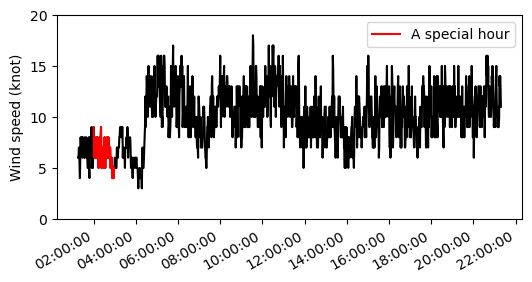

In [14]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(met_data.index, met_data['Speed'], color='k')
ax.plot(met_data[start_time:end_time].index,
        met_data[start_time:end_time]['Speed'],
        color='r',
        label='A special hour')

# Format the dates.  See https://strftime.org/ for formats.
fmt = mpl.dates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(fmt)
fig.autofmt_xdate()

ax.set_ylabel('Wind speed (knot)')  # units from .txt file
ax.set_ylim([0, 20])
ax.legend()
# fig.savefig('wind_speed_datetime_plot.png', dpi=200)  # uncomment to save

Grouping by hour (`'h'`) and taking the mean now becomes a lot easier:

In [15]:
met_data_hourly = met_data.drop(['Time', 'Date'], axis=1).resample('h').mean()

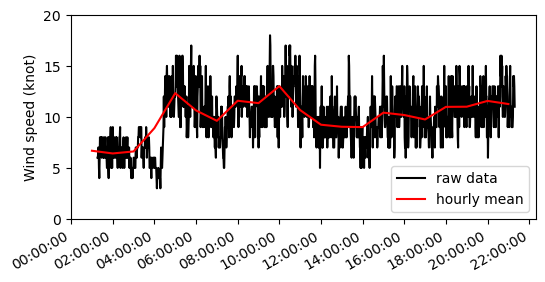

In [16]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(met_data.index, met_data['Speed'], color='k', label='raw data')
ax.plot(met_data_hourly.index, met_data_hourly['Speed'], color='r', label='hourly mean')

# Format the dates.  See https://strftime.org/ for formats.
fmt = mpl.dates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(fmt)
fig.autofmt_xdate()

ax.set_ylabel('Wind speed (knot)')  # units from .txt file
ax.set_ylim([0, 20])
ax.legend()
# fig.savefig('wind_speed_datetime_hourly_means.png', dpi=200)  # uncomment to save